## Regression and Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("C:/Users/School/Documents/Depaul/2019.2020/DSC478/Project/stock_complete_info.csv", sep=',')

In [3]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,country,industry,longBusinessSummary,sector,sharesOutstanding,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,Qtr,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return
0,A 2019_Q2,4/30/2019,76.75,77.89,76.69,77.80,1726200,0.0,0.0,1.059000e+09,5.293000e+09,4.653000e+09,4.848000e+09,415000000.0,9.501000e+09,3000000.0,204000000.0,73000000.0,8.330000e+08,3.589000e+09,-5.210000e+08,5.980000e+08,1.226000e+09,1.892000e+09,-5.210000e+08,1.035000e+09,3.102000e+09,1.180000e+08,2.000000e+08,966000000.0,1.787000e+09,7.060000e+08,3.290000e+08,NaN,NaN,-1000000.0,-15000000,-3.500000e+07,56000000.0,-61000000.0,-275000000.0,32000000.0,197000000,-156000000.0,-93000000.0,-1000000.0,-59000000.0,79000000.0,-56000000.0,-32000000.0,-40000000.0,27000000.0,-34000000.0,NaN,NaN,104000000.0,NaN,219000000.0,NaN,389000000.0,723000000,230000000,230000000,NaN,-20000000.0,NaN,NaN,NaN,22000000,1.357000e+09,1.127000e+09,6.340000e+08,-11000000,NaN,197000000.0,197000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,-6.917019,-2.619706,76.215598,-3.173615,50.321067,-12.902244,14510593.61,-0.135524,7.299270,1.521994,0,0,14.867414,29.279115,-0.610567,NaN,NaN,2019_Q2,2.110926,1.502301,0,0
1,A 2019_Q3,7/31/2019,69.71,70.18,68.45,68.94,3846100,0.0,0.0,1.107000e+09,5.277000e+09,4.704000e+09,4.748000e+09,666000000.0,9.452000e+09,3000000.0,130000000.0,-18000000.0,8.330000e+08,3.593000e+09,-5.140000e+08,6.110000e+08,1.382000e+09,2.080000e+09,-5.140000e+08,8.500000e+08,3.189000e+09,1.020000e+08,4.800000e+07,998000000.0,1.786000e+09,6.790000e+08,3.540000e+08,410000000.0,NaN,-2000000.0,29000000,-1.193000e+09,600000000.0,497000000.0,23000000.0,2000000.0,194000000,-383000000.0,-50000000.0,-1000000.0,314000000.0,76000000.0,-51000000.0,-5000000.0,-48000000.0,45000000.0,-30000000.0,-1000000.0,-4000000.0,102000000.0,NaN,231000000.0,NaN,322000000.0,737000000,313000000,313000000,NaN,-21000000.0,NaN,NaN,NaN,37000000,1.367000e+09,1.054000e+09,6.300000e+08,-82000000,NaN,194000000.0,194000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,3.067090,-2.039000,69.517929,-1.612673,41.318386,-14.191339,20756944.92,-0.038812,29.012506,1.366337,0,0,17.365258,27.167584,-0.590718,NaN,NaN,2019_Q3,-2.051225,-2.049707,1,1
2,A 2019_Q4,10/31/2019,75.65,75.77,74.75,75.40,970500,0.0,0

Some features were removed to limit regression to balance sheet and income statement data

In [4]:
dataFundamentals = data.drop(['Date', 'Open', 'High', 'Low', 'Volume', 'Dividends', 
                            'Stock Splits', 'Issuance Of Stock', 'Repurchase Of Stock', 'longBusinessSummary', 
                             'country', 'industry'], axis=1)

In [5]:
dataFundamentals.drop(dataFundamentals.iloc[:, 70:86], axis=1, inplace=True)

In [6]:
dataFundamentals.drop(dataFundamentals.iloc[:, 72:], axis=1, inplace=True)

In [7]:
dataFundamentals.head()

,Unnamed: 0,Close,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sector,sharesOutstanding,sharesShort,Deferred Long Term Liab,Qtr
0,A 2019_Q2,77.80,1.059000e+09,5.293000e+09,4.653000e+09,4.848000e+09,415000000.0,9.501000e+09,3000000.0,204000000.0,73000000.0,8.330000e+08,3.589000e+09,-5.210000e+08,5.980000e+08,1.226000e+09,1.892000e+09,-5.210000e+08,1.035000e+09,3.102000e+09,1.180000e+08,2.000000e+08,966000000.0,1.787000e+09,7.060000e+08,3.290000e+08,NaN,NaN,-1000000.0,-15000000,-3.500000e+07,56000000.0,-61000000.0,-275000000.0,197000000,-156000000.0,-1000000.0,-59000000.0,79000000.0,-56000000.0,-32000000.0,-40000000.0,27000000.0,-34000000.0,NaN,NaN,104000000.0,NaN,219000000.0,NaN,389000000.0,723000000,230000000,230000000,NaN,-20000000.0,NaN,NaN,NaN,22000000,1.357000e+09,1.127000e+09,6.340000e+08,-11000000,NaN,197000000.0,197000000.0,Healthcare,309651008,5258241.0,NaN,2019_Q2
1,A 2019_Q3,68.94,1.107000e+09,5.277000e+09,4.704000e+09,4.748000e+09,666000000.0,9.452000e+09,3000000.0,130000000.0,-18000000.0,8.330000e+08,3.593000e+09,-5.140000e+08,6.110000e+08,1.382000e+09,2.080000e+09,-5.140000e+08,8.500000e+08,3.189000e+09,1.020000e+08,4.800000e+07,998000000.0,1.786000e+09,6.790000e+08,3.540000e+08,410000000.0,NaN,-2000000.0,29000000,-1.193000e+09,600000000.0,497000000.0,23000000.0,194000000,-383000000.0,-1000000.0,314000000.0,76000000.0,-51000000.0,-5000000.0,-48000000.0,45000000.0,-30000000.0,-1000000.0,-4000000.0,102000000.0,NaN,231000000.0,NaN,322000000.0,737000000,313000000,313000000,NaN,-21000000.0,NaN,NaN,NaN,37000000,1.367000e+09,1.054000e+09,6.300000e+08,-82000000,NaN,194000000.0,194000000.0,Healthcare,309651008,5258241.0,NaN,2019_Q3
2,A 2019_Q4,75.40,5.110000e+08,5.270000e+09,3.878000e+09,4.747000e+09,381000000.0,8.625000e+09,3000000.0,176000000.0,-122000000.0,9.620000e+08,3.107000e+09,-4.040000e+08,6.120000e+08,1.765000e+09,1.622000e+09,-4.040000e+08,8.390000e+08,3.457000e+09,9.900000e+07,1.129000e+09,856000000.0,1.294000e+09,6.600000e+08,3.160000e+08,NaN,504000000.0,-3000000.0,8000000,-5.100000e+07,600000000.0,-582000000.0,10000000.0,191000000,-390000000.0,1000000.0,242000000.0,55000000.0,-51000000.0,-10000000.0,-41000000.0,29000000.0,-47000000.0,-1000000.0,-4000000.0,101000000.0,NaN,222000000.0,NaN,341000000.0,692000000,250000000,250000000,NaN,-18000000.0,NaN,NaN,NaN,31000000,1.274000e+09,1.024000e+09,5.820000e+08,-28000000,NaN,191000000.0,191000000.0,Healthcare,309651008,5258241.0,NaN,2019_Q4
3,A 2020_Q1,82.35,5.380000e+08,5.343000e+09,3.897000e+09,5.125000e+09,381000000.0,9.022000e+09,3000000.0,181000000.0,178000000.0,9.810000e+08,3.112000e+09,-3.990000e+08,6.370000e+08,2.155000e+09,1.118000e+09,-3.980000e+08,8.270000e+08,3.812000e+09,9.60000

Regression results did not make a whole lot of sense when I included Q1 of 2020. I therefore, ran regression analysis to leave out the violent market moves of the first quarter in 2020.

In [8]:
fundamentalsPerShareExQ1202 = dataFundamentals[~dataFundamentals.Qtr.str.contains("2020_Q1")]

Total values were divided by the number of shares outstanding to give values per share. 

In [9]:
fundamentalsPerShare = fundamentalsPerShareExQ1202.iloc[:,2:67].div(fundamentalsPerShareExQ1202.sharesOutstanding, axis=0)

In [10]:
fundamentalsPerShare['sharesShort'] = fundamentalsPerShareExQ1202.iloc[:,69].div(fundamentalsPerShareExQ1202.sharesOutstanding, axis=0)

In [11]:
fundamentalsPerShare['Close'] = data['Close']

In [12]:
fundamentalsPerShare = fundamentalsPerShare.fillna(0)
fundamentalsPerShare.head()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sharesShort,Close
0,3.419979,17.093437,15.026594,15.656335,1.340218,30.682929,0.009688,0.658806,0.235749,2.690125,11.590468,-1.682539,1.931206,3.959296,6.110104,-1.682539,3.342473,10.017729,0.381074,0.645888,3.119641,5.771013,2.279986,1.062486,0.000000,0.000000,-0.003229,-0.048442,-0.113030,0.180849,-0.196996,-0.888097,0.636200,-0.503793,-0.003229,-0.190537,0.255126,-0.180849,-0.103342,-0.129178,0.087195,-0.109801,0.000000,0.000000,0.335862,0.0,0.707248,0.000000,1.256253,2.334887,0.742772,0.742772,0.000000,-0.064589,0.0,0.0,0.0,0.071048,4.382353,3.639581,2.047466,-0.035524,0.0,0.636200,0.636200,0.016981,77.80
1,3.574992,17.041766,15.191296,15.333391,2.150808,30.524687,0.009688,0.419827,-0.058130,2.690125,11.603385,-1.659933,1.973189,4.463089,6.717240,-1.659933,2.745026,10.298691,0.329403,0.155013,3.222983,5.767784,2.192791,1.143223,1.324071,0.000000,-0.006459,0.093654,-3.852724,1.937665,1.605033,0.074277,0.626512,-1.236876,-0.003229,1.014045,0.245438,-0.164702,-0.016147,-0.155013,0.145325,-0.096883,-0.003229,-0.012918,0.329403,0.0,0.746001,0.000000,1.039880,2.380099,1.010815,1.010815,0.000000,-0.067818,0.0,0.0,0.0,0.119489,4.414647,3.403832,2.034549,-0.264814,0.0,0.626512,0.626512,0.016981,68.94
2,1.650245,17.019160,12.523776,15.330162,1.230417,27.853938,0.009688,0.568382,-0.393992,3.106723,10.033877,-1.304695,1.976419,5.699965,5.238155,-1.304695,2.709502,11.164181,0.319715,3.646040,2.764402,4.178898,2.131432,1.020504,0.000000,1.627639,-0.009688,0.025836,-0.164702,1.937665,-1.879535,0.032294,0.616823,-1.259482,0.003229,0.781525,0.177619,-0.164702,-0.032294,-0.132407,0.093654,-0.151784,-0.003229,-0.012918,0.326174,0.0,0.716936,0.000000,1.101240,2.234774,0.807361,0.807361,0.000000,-0.058130,0.0,0.0,0.0,0.100113,4.114309,3.306949,1.879535,-0.090424,0.0,0.616823,0.616823,0.016981,75.40
4,0.000000,51.888186,42.168900,22.993883,2.888354,73.424445,0.010757,0.285070,-2.560255,20.040985,0.000000,-26.344805,11.289862,4.458931,11.956819,-26.344805,38.511393,17.927161,5.696029,22.993883,3.576826,9.687014,8.116437,6.863204,2.285942,0.005379,-0.005379,-0.650821,0.575519,0.000000,-0.236662,-0.715365,0.430295,-0.274313,-0.129088,-0.484082,0.914377,0.000000,0.220526,-0.376508,-0.247420,-0.489460,0.000000,-0.236662,0.037651,0.0,1.177932,8.261662,0.457188,2.000871,0.597034,0.597034,-0.005379,-0.161361,0.0,0.0,0.0,0.430295,12.806652,12.209618,10.805781,0.580898,0.0,0.747637,0.430295,0.062570,23.41
5,0.279692,51.845156,47.036611,22.117158,3.248726,78.695558,0.010757,0.338857,-2.985171,23.036913,0.806803,-26.753585,9.391186,4.727865,13.785573,-26.753585,43.244637,18.986762,5.986478,21.030663,3.549933,9.676256,8.842560,7.981970

I removed outliers in the event that some stock price changes from quarter to quarter did not make sense.

In [13]:
q_low = fundamentalsPerShare['Close'].quantile(0.01)
q_hi  = fundamentalsPerShare['Close'].quantile(0.99)

fundsExOutliers = fundamentalsPerShare[(fundamentalsPerShare['Close'] < q_hi) & 
                                       (fundamentalsPerShare['Close'] > q_low)]

In [14]:
xTarget = fundsExOutliers.drop(['Close'], axis=1)
x = np.array(xTarget)
y = np.array(fundsExOutliers['Close'])

In [15]:
x = np.array([np.concatenate((v,[1])) for v in x])

In [16]:
linreg = LinearRegression()

linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is run and we can see predictions and error for teh first several observations

In [17]:
print (linreg.predict(x[:10]))

[62.72535921 61.71334908 72.51676579 52.89658154 50.32962015 50.30690673
  1.48294348 60.08184558 62.90651722 22.4306456 ]


In [18]:
p = linreg.predict(x)

err = abs(p-y)

print (err[:10])

[15.07464079  7.22665092  2.88323421 29.48658154 30.25962015 28.79690673
 30.78705652 33.30184558 34.33651722 12.1506456 ]


In [19]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print ('The RMSE of the linear regression model is:')
print(round(rmse_train,2))

The RMSE of the linear regression model is:
40.38


The below graph shows the variables and weights applied to each for the linear regression.

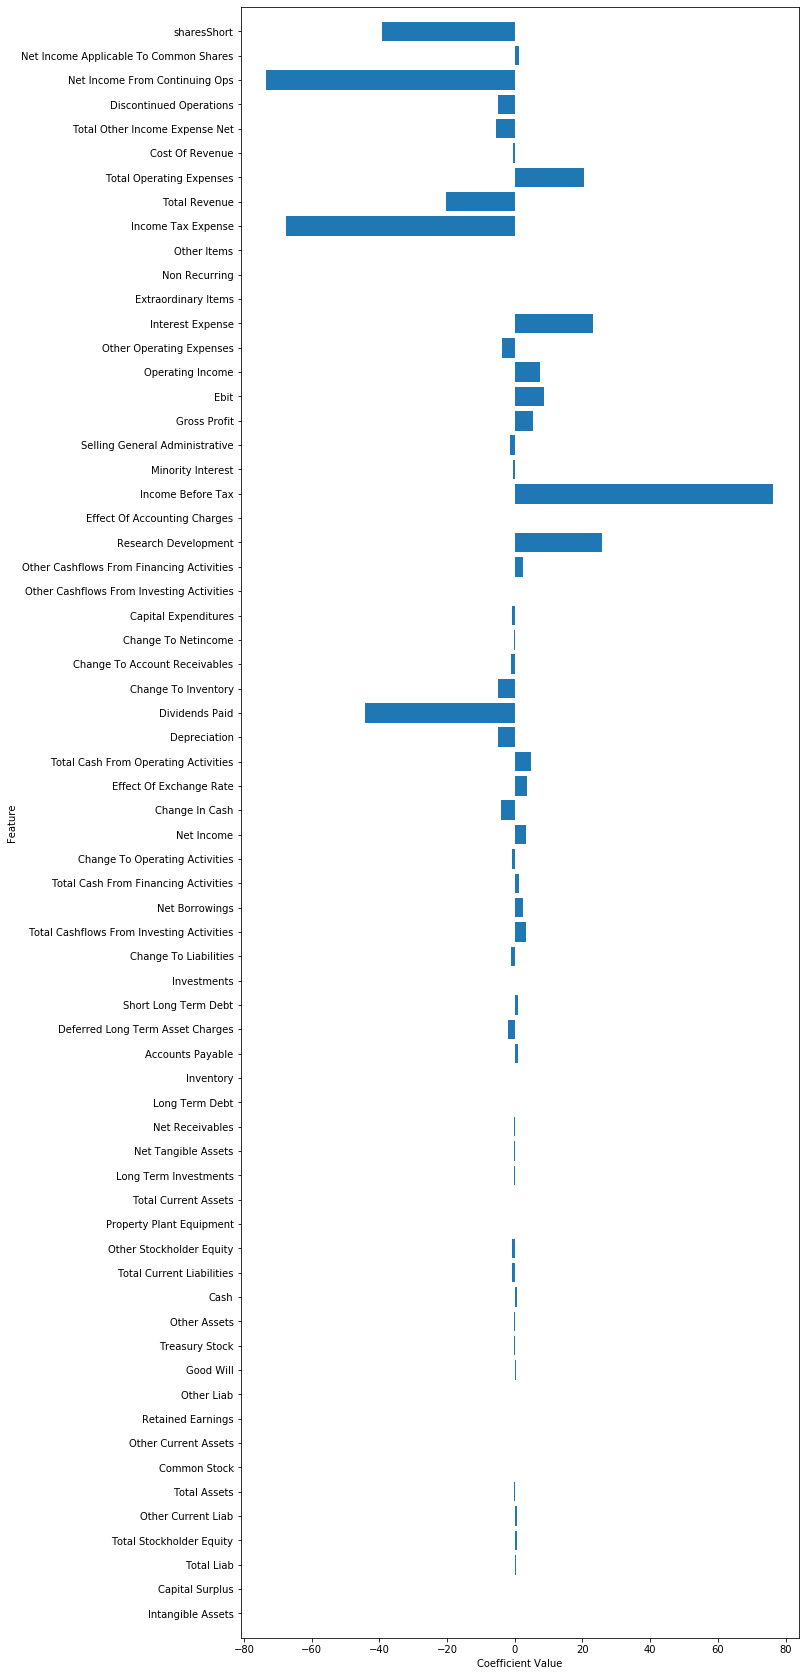

In [20]:
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    figure(figsize=(10,30))
    plt.barh(range(n_features), model.coef_[:-1], align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_coefficients(linreg, len(xTarget.columns), xTarget.columns)

The graph below shows the error around predicted and actual values of prices for stocks. 

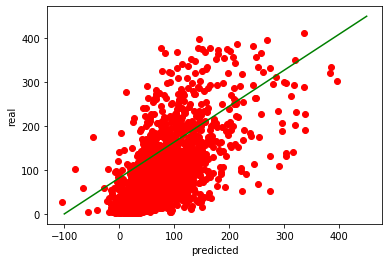

In [21]:
%matplotlib inline
plt.plot(p, y,'ro')
plt.plot([-100,450],[0,450], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [22]:
n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(x)

xval_err = 0

for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

In [23]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 40.3784
RMSE on 10-fold CV: 44.5399


The average close price of stocks for the three quarters was 70.8. Therefore, the RMSE of 40 is relatively high. However, there are some features that are important to stock price. 

C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: inval

1 0.22827268884605934
6 0.3516238778485302
11 0.38757387091169093
16 0.4010732798292108
21 0.39810831223702126
26 0.3830605909231679
31 0.3886621903904531
36 0.40411583676499774


C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarnin

41 0.4137051290692405
46 0.40901979646012226
51 0.3994920193389178
56 0.367990925411134
61

C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarnin

 0.3576620243719954
66 0.3389916245995218
71 0.3400599549537039
76

C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: inval

 0.35203322451869834
81 0.38780728799489816
86 0.402291627485846


C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: inval

91 0.3911094025666636
96 0.390519284451034
8
Optimal percentile of features:41 

Optimal number of features:27 



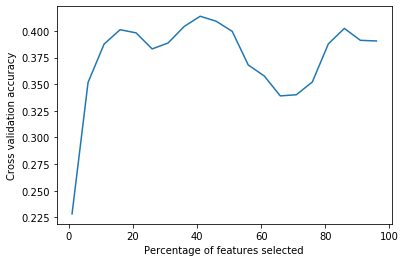

In [24]:
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(x, y)
    scores = model_selection.cross_val_score(linreg, X_train_fs, y, cv=5)
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(xTarget.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [25]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
X_train_fs = fs.fit_transform(x, y)

C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\School\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\School\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: inval

Earnings, Revenue, Income and other features from the income statement have an impact on stock price just as balance sheet data of Assets and Equity.

In [26]:
for i in range(len(xTarget.columns.values)):
    if fs.get_support()[i]:
        print (xTarget.columns.values[i],'\t', fs.scores_[i])

Intangible Assets 	 462.1984842380316
Capital Surplus 	 263.1954735439674
Total Stockholder Equity 	 935.5561370003327
Total Assets 	 249.86666673498854
Retained Earnings 	 1221.2905534316508
Good Will 	 971.0721219985069
Treasury Stock 	 776.5634368414084
Cash 	 284.0225711002569
Other Stockholder Equity 	 302.20362306323966
Property Plant Equipment 	 392.78380732035504
Long Term Debt 	 262.8869298749185
Inventory 	 221.37344721264338
Net Income 	 369.26052670903573
Total Cash From Operating Activities 	 266.7246402896591
Depreciation 	 320.2925571692214
Dividends Paid 	 1409.1574426748014
Research Development 	 353.0264419735443
Income Before Tax 	 508.9782514040174
Selling General Administrative 	 710.3276275244559
Gross Profit 	 1747.1839608105097
Ebit 	 1263.3416989400635
Operating Income 	 1261.990056703766
Interest Expense 	 267.74441059162916
Total Revenue 	 604.6925931431941
Total Operating Expenses 	 472.0857156047714
Cost Of Revenue 	 317.4590535081692
Net Income From Contin

I also ran just Q3 below to see if results differed. I feel like this is not necessary for this project though. 

### Q3-2019 Regression

In [ ]:
Q32019 = dataFundamentals[dataFundamentals.Qtr.str.contains("2019_Q3")].drop(['sector', 'Qtr'], axis=1)
Q32019PerShare = Q32019.iloc[:,2:70].div(Q32019.sharesOutstanding, axis=0)
Q32019PerShare['Close'] = Q32019['Close']
Q32019PerShare = Q32019PerShare.drop(['sharesOutstanding'], axis=1).fillna(0)
Q32019PerShare.head()

In [ ]:
q_low3 = Q32019PerShare['Close'].quantile(0.01)
q_hi3  = Q32019PerShare['Close'].quantile(0.99)

Q32019exOutliers = Q32019PerShare[(Q32019PerShare['Close'] < q_hi3) & 
                                       (Q32019PerShare['Close'] > q_low3)]

In [ ]:
xTarget3 = Q32019exOutliers.drop(['Close'], axis=1)
x3 = np.array(xTarget3)
y3 = np.array(Q32019exOutliers['Close'])

In [ ]:
x3 = np.array([np.concatenate((v,[1])) for v in x3])

In [ ]:
linreg3 = LinearRegression()

linreg3.fit(x3,y3)

In [ ]:
print (linreg3.predict(x3[:10]))

In [ ]:
p3 = linreg3.predict(x3)

err3 = abs(p3-y3)

print (err3[:10])

In [ ]:
total_error3 = np.dot(err3,err3)


rmse_train3 = np.sqrt(total_error3/len(p3))
print ('The RMSE on Q3 2019 data is: ')
print(round(rmse_train3,2))

In [ ]:
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    figure(figsize=(10,30))
    plt.barh(range(n_features), model.coef_[:-1], align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_coefficients(linreg3, len(xTarget3.columns), xTarget3.columns)

In [ ]:
%matplotlib inline
plt.plot(p3, y3,'ro')
plt.plot([-100,450],[0,450], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [ ]:
n = 10

kf3 = KFold(n_splits=n)
kf3.get_n_splits(x3)

xval_err3 = 0

for train3, test3 in kf3.split(x3):
    linreg3.fit(x3[train3],y3[train3])
    p3 = linreg3.predict(x3[test3])
    e3 = p3-y3[test3]
    xval_err3 += np.sqrt(np.dot(e3,e3)/len(x3[test3]))
       
rmse_10cv3 = xval_err3/n

In [ ]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train3)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv3)

In [ ]:
percentiles3 = range(1, 100, 5)
results3 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs3 = fs.fit_transform(x3, y3)
    scores3 = model_selection.cross_val_score(linreg3, X_train_fs3, y3, cv=5)
    print (i,scores3.mean())
    results3 = np.append(results3, scores3.mean())

optimal_percentile3 = np.where(results3 == results3.max())[0]
print(optimal_percentile3[0])
print ("Optimal percentile of features:{0}".format(percentiles3[optimal_percentile3[0]]), "\n")
optimal_num_features3 = int(percentiles3[optimal_percentile3[0]]*len(xTarget3.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features3), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles3,results3)

### Ridge Regression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [28]:
def modelTraining(x, y, alpha, modelType):
    print('Method: %s' %modelType.__name__)
    
    n = 5
    t_rmse = np.array([])
    cv_rmse = np.array([])
    minAlpha = alpha[0]
    
    for a in alpha:
        model = modelType(alpha=a)
        model.fit(x,y)
        p = model.predict(x)
        e = p-y
        total_error = np.dot(e,e)
        rmse_train = np.sqrt(total_error/len(p))

        #kf = KFold(len(x), n_folds=5)
        kf = KFold(n_splits=n)
        kf.get_n_splits(x)

        KFold(n_splits=n,random_state=None, shuffle=False)
        err = 0
        for train,test in kf.split(x):
            model.fit(x[train],y[train])
            p = model.predict(x[test])
            e = p-y[test]
            err += np.dot(e,e)
        rmse_5cv = np.sqrt(err/len(x))
        
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_5cv])
        if (rmse_5cv <= np.amin(cv_rmse)):
            minAlpha = a
    
    print ('\nThe plot of training error vs cross validation error')
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()
    
    print ("The model with lowest cv error has alpha value of: ", minAlpha)
    model = modelType(alpha = minAlpha)
    model.fit(x, y)    
    p = model.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_test = np.sqrt(total_error/len(p))
    print ("\nThe RMSE on the test set with alpha for min error is: ", rmse_test)

In [29]:
alpha = np.linspace(.01,20,50)

Method: Ridge

The plot of training error vs cross validation error


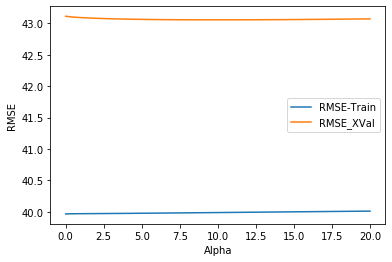

The model with lowest cv error has alpha value of:  9.801020408163264

The RMSE on the test set with alpha for min error is:  43.95313607512499


In [30]:
modelTraining(X_train, y_train, alpha, Ridge)

### Lasso Regression

Method: Lasso

The plot of training error vs cross validation error


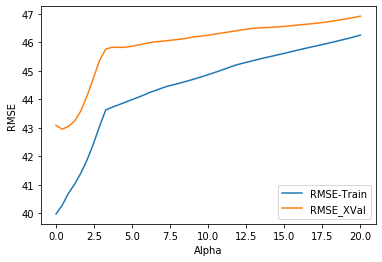

The model with lowest cv error has alpha value of:  0.41795918367346935

The RMSE on the test set with alpha for min error is:  43.531204495645625


In [31]:
import warnings
warnings.filterwarnings('ignore')
modelTraining(X_train, y_train, alpha, Lasso)

## The pricing model with regression had some explanatory power, but errors were high enough that we may not want to trade on it. Next, instead of attempting to price stocks, we'll see if we can determine which ones will outperform the median and which will underperform the median

### Bayes, Decision Trees and Linear Discriminent Analysis

In [32]:
dataFundamentalsReturn = data.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 
                            'Stock Splits', 'Issuance Of Stock', 'Repurchase Of Stock', 'longBusinessSummary', 
                             'country', 'industry'], axis=1)

In [33]:
dataFundamentalsReturn.drop(dataFundamentalsReturn.iloc[:, 70:86], axis=1, inplace=True)

In [34]:
dataFundamentalsReturn.drop(dataFundamentalsReturn.iloc[:, 71:75], axis=1, inplace=True)

Again we dropped some features that were not relevent. Next we calculate a median return for each quarter and add it to our data set

In [35]:
m = dataFundamentalsReturn.groupby(['Qtr'])[['Return']].apply(np.median)

In [36]:
m.name = 'MEDIAN'
m

Qtr
2019_Q2     3.064397
2019_Q3    -0.337978
2019_Q4     7.677086
2020_Q1   -30.807202
Name: MEDIAN, dtype: float64

In [37]:
dataFundamentalsReturn = dataFundamentalsReturn.join(m, on=['Qtr'])

In [38]:
dataFundamentalsReturn['Outperform'] = np.sign(dataFundamentalsReturn['Return'] - dataFundamentalsReturn['MEDIAN'])
dataFundamentalsReturn['Outperform'] = dataFundamentalsReturn['Outperform'].where(dataFundamentalsReturn['Outperform'] != -1, 0)

In [39]:
dataFundamentalsReturn.head()

,Unnamed: 0,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sector,sharesOutstanding,sharesShort,Return,Qtr,MEDIAN,Outperform
0,A 2019_Q2,1.059000e+09,5.293000e+09,4.653000e+09,4.848000e+09,415000000.0,9.501000e+09,3000000.0,204000000.0,73000000.0,8.330000e+08,3.589000e+09,-5.210000e+08,5.980000e+08,1.226000e+09,1.892000e+09,-5.210000e+08,1.035000e+09,3.102000e+09,1.180000e+08,2.000000e+08,966000000.0,1.787000e+09,7.060000e+08,3.290000e+08,NaN,NaN,-1000000.0,-15000000,-3.500000e+07,56000000.0,-61000000.0,-275000000.0,197000000,-156000000.0,-1000000.0,-59000000.0,79000000.0,-56000000.0,-32000000.0,-40000000.0,27000000.0,-34000000.0,NaN,NaN,104000000.0,NaN,219000000.0,NaN,389000000.0,723000000,230000000,230000000,NaN,-20000000.0,NaN,NaN,NaN,22000000,1.357000e+09,1.127000e+09,6.340000e+08,-11000000,NaN,197000000.0,197000000.0,Healthcare,309651008,5258241.0,-6.917019,2019_Q2,3.064397,0.0
1,A 2019_Q3,1.107000e+09,5.277000e+09,4.704000e+09,4.748000e+09,666000000.0,9.452000e+09,3000000.0,130000000.0,-18000000.0,8.330000e+08,3.593000e+09,-5.140000e+08,6.110000e+08,1.382000e+09,2.080000e+09,-5.140000e+08,8.500000e+08,3.189000e+09,1.020000e+08,4.800000e+07,998000000.0,1.786000e+09,6.790000e+08,3.540000e+08,410000000.0,NaN,-2000000.0,29000000,-1.193000e+09,600000000.0,497000000.0,23000000.0,194000000,-383000000.0,-1000000.0,314000000.0,76000000.0,-51000000.0,-5000000.0,-48000000.0,45000000.0,-30000000.0,-1000000.0,-4000000.0,102000000.0,NaN,231000000.0,NaN,322000000.0,737000000,313000000,313000000,NaN,-21000000.0,NaN,NaN,NaN,37000000,1.367000e+09,1.054000e+09,6.300000e+08,-82000000,NaN,194000000.0,194000000.0,Healthcare,309651008,5258241.0,3.067090,2019_Q3,-0.337978,1.0
2,A 2019_Q4,5.110000e+08,5.270000e+09,3.878000e+09,4.747000e+09,381000000.0,8.625000e+09,3000000.0,176000000.0,-122000000.0,9.620000e+08,3.107000e+09,-4.040000e+08,6.120000e+08,1.765000e+09,1.622000e+09,-4.040000e+08,8.390000e+08,3.457000e+09,9.900000e+07,1.129000e+09,856000000.0,1.294000e+09,6.600000e+08,3.160000e+08,NaN,504000000.0,-3000000.0,8000000,-5.100000e+07,600000000.0,-582000000.0,10000000.0,191000000,-390000000.0,1000000.0,242000000.0,55000000.0,-51000000.0,-10000000.0,-41000000.0,29000000.0,-47000000.0,-1000000.0,-4000000.0,101000000.0,NaN,222000000.0,NaN,341000000.0,692000000,250000000,250000000,NaN,-18000000.0,NaN,NaN,NaN,31000000,1.274000e+09,1.024000e+09,5.820000e+08,-28000000,NaN,191000000.0,191000000.0,Healthcare,309651008,5258241.0,11.563265,2019_Q4,7.677086,1.0
3,A 2020_Q1,5.380000e+08,5.343000e+09,3.897000e+09,5.125000e+09,381000000.0,9.022000e+09,3000000.0,181000000.0,178000000.0,9.810000e+08,3.112000e+09,-3.990000e+08,6.370000e+08,2.155000e+09,1.118000e+09,-3.980000e+08,8.270

Again here we put all measures into per share units. We also create dummy variables for sectors and include which sector a stock belongs to in our classification models.

In [40]:
sectors = dataFundamentalsReturn['sector']
dataFundamentalsExSector = dataFundamentalsReturn.drop(['sector'], axis=1)

In [41]:
dataFundamentalsExSectorPerShare = dataFundamentalsExSector.iloc[:,1:68].div(dataFundamentalsExSector.sharesOutstanding, axis=0)

In [42]:
dataFundamentalsExSectorPerShare['Sector'] = sectors
target = dataFundamentalsReturn['Outperform']

In [43]:
dataFundamentalsExSectorPerShare = dataFundamentalsExSectorPerShare.drop(['sharesOutstanding'], axis=1)

In [44]:
dataFundamentalsExSectorPerShare = pd.get_dummies(dataFundamentalsExSectorPerShare,
    columns=['Sector'], prefix=['sector'])

In [45]:
dataFeatures = dataFundamentalsExSectorPerShare.fillna(0)
dataFeatures.shape

(7648, 77)

We created training and testing sets and then scale all data.

In [46]:
train, test, target_train, target_test = train_test_split(dataFeatures, target, test_size=0.2, random_state=33)

print (test.shape)
test[0:5]

(1530, 77)


,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sharesShort,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
7198,0.168795,6.953084,74.818360,8.293334,0.000000,83.631061,0.288921,0.344037,1.124524,0.016018,2.686517,-0.073195,67.752167,1.234042,68.341880,-0.065556,1.477892,2.137884,9.407805,5.496728,0.000000,5.712194,0.022249,63.273069,0.000000,0.000000,0.322712,0.000000,-1.784747,-0.278312,1.528077,-0.132928,0.202829,0.106605,0.000000,0.363275,0.044206,-0.106094,0.000000,0.000000,0.244752,0.000000,0.012394,1.912591,0.000000,0.0,0.265510,0.000000,0.284938,0.616353,0.000000,0.290157,0.041259,0.000000,0.0,0.0,0.0,0.062681,0.616353,0.326197,0.000000,-0.024647,0.0,0.202829,0.194973,0.030619,0,0,0,0,0,1,0,0,0,0,0
344,0.000000,0.000000,452.915135,36.228816,0.000000,489.143951,48.982195,0.629763,-14.645349,8.856886,0.000000,1.891970,356.076279,16.510521,360.806204,1.891970,24.290109,24.043564,84.733999,36.228816,6.903279,83.252045,0.000000,327.809281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.854870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.101416,0.000000,1.629345,2.028642,0.000000,-1.101416,1.500713,0.000000,0.0,0.0,0.0,-0.246546,2.028642,3.130058,0.000000,0.000000,0.0,-0.854870,-0.854870,0.027176,0,0,0,0,0,1,0,0,0,0,0
510,1.581908,4.798223,5.981608,8.045609,0.151612,14.027217,0.001326,0.000000,7.278925,0.290476,3.309835,-4.032865,0.185642,0.558071,2.986255,0.005303,3.352927,5.591456,0.005448,3.153865,1.314404,1.806248,3.549193,0.536588,0.000000,1.449110,0.000000,-0.109228,-0.069332,0.421495,0.411725,-0.369232,-0.038280,-0.186732,0.000000,-0.529125,0.260513,0.000000,-0.575249,0.254793,0.040350,-0.067098,0.000000,-0.015889,0.058636,0.0,-0.026858,0.000000,0.789601,0.868994,0.020756,0.020756,0.000000,-0.047704,0.0,0.0,0.0,0.011422,2.245666,2.224910,1.376672,-0.047614,0.0,-0.038280,-0.038280,0.037017,0,0,0,0,0,0,0,1,0,0,0
3194,5.265059,7.173718,50.293099,6.730933,3.543790,57.119239,0.010578,2.904547,11.740598,9.644548,8.397799,-12.193961,7.936880,3.301996,10.649503,1.289063,17.082728,15.890383,2.546390,-6.931924,4.598615,29.656003,5.085225,4.025866,7.631615,0.346067,0.000000,0.007556,-0.642265,-0.027202,-0.282596,0.214592,0.811520,0.891614,-0.049870,1.866345,0.385359,-0.272018,-0.311309,0.541014,0.217614,-0.621108,-0.021157,-0.063471,0.225170,0.0,1.225592,0.095206,1.097139,2.886413,1.564103,1.564103,0.000000,-0.276552,0.0,0.0,0.0,0.412561,7.110247,5.546144,4.223835,-0.338511,0

In [47]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train)
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

In [48]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
train_norm[0:5]

array([[0.01, 0.01, 0.01, 0.16, 0.  , 0.02, 0.05, 0.  , 0.12, 0.  , 0.02,
        0.96, 0.  , 0.02, 0.  , 0.34, 0.09, 0.02, 0.  , 0.39, 0.02, 0.01,
        0.05, 0.  , 0.03, 0.  , 0.46, 0.47, 0.62, 0.27, 0.31, 0.18, 0.65,
        0.42, 0.54, 0.52, 0.23, 0.96, 0.76, 0.75, 0.28, 0.91, 0.72, 0.53,
        0.04, 0.  , 0.67, 0.2 , 0.06, 0.42, 0.67, 0.67, 0.15, 0.97, 0.  ,
        0.  , 0.  , 0.71, 0.06, 0.06, 0.13, 0.64, 0.19, 0.65, 0.65, 0.01,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.  , 0.11, 0.  , 0.01, 0.04, 0.  , 0.09, 0.  , 0.02,
        0.97, 0.  , 0.  , 0.  , 0.41, 0.01, 0.  , 0.  , 0.34, 0.  , 0.01,
        0.  , 0.  , 0.04, 0.  , 0.46, 0.46, 0.63, 0.27, 0.31, 0.18, 0.64,
        0.42, 0.56, 0.51, 0.2 , 1.  , 0.78, 0.75, 0.27, 0.94, 0.72, 0.52,
        0.  , 0.  , 0.66, 0.21, 0.02, 0.38, 0.66, 0.66, 0.15, 0.98, 0.  ,
        0.  , 0.  , 0.7 , 0.02, 0.02, 0.1 , 0.64, 0.19, 0.64, 0.64, 0.01,
        0.  , 0.  , 0.  , 0.  , 0.  ,

In [49]:
test_norm[0:5]

array([[0.  , 0.01, 0.02, 0.11, 0.  , 0.02, 0.04, 0.  , 0.09, 0.  , 0.01,
        0.97, 0.02, 0.  , 0.02, 0.44, 0.  , 0.  , 0.01, 0.35, 0.  , 0.01,
        0.  , 0.02, 0.  , 0.  , 0.46, 0.46, 0.62, 0.27, 0.32, 0.18, 0.64,
        0.42, 0.56, 0.51, 0.19, 0.98, 0.77, 0.75, 0.28, 0.94, 0.72, 0.54,
        0.  , 0.  , 0.66, 0.2 , 0.01, 0.38, 0.66, 0.66, 0.15, 1.  , 0.  ,
        0.  , 0.  , 0.7 , 0.02, 0.01, 0.09, 0.64, 0.19, 0.64, 0.64, 0.05,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.12, 0.14, 0.  , 0.12, 0.22, 0.  , 0.08, 0.  , 0.  ,
        0.97, 0.12, 0.04, 0.1 , 0.45, 0.08, 0.01, 0.07, 0.38, 0.01, 0.11,
        0.  , 0.09, 0.  , 0.  , 0.46, 0.46, 0.63, 0.27, 0.31, 0.18, 0.64,
        0.42, 0.56, 0.51, 0.19, 1.  , 0.77, 0.75, 0.28, 0.94, 0.72, 0.53,
        0.  , 0.  , 0.65, 0.2 , 0.03, 0.39, 0.66, 0.65, 0.17, 1.  , 0.  ,
        0.  , 0.  , 0.7 , 0.02, 0.02, 0.09, 0.64, 0.19, 0.64, 0.63, 0.04,
        0.  , 0.  , 0.  , 0.  , 0.  ,

Naive Bayes Classification

In [50]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, target_train)
nbpreds_test = nbclf.predict(test)
print (nbpreds_test)

[0. 0. 0. ... 1. 0. 0.]


In [51]:
print ('nbclf score on training set is {:0.4f}'.format(nbclf.score(train, target_train)))
print ('nbclf score on testing set is {:0.4f}'.format(nbclf.score(test, target_test)))

nbclf score on training set is 0.5165
nbclf score on testing set is 0.5157


Decision Tree Classification

In [52]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(train, target_train)
treepreds_test = treeclf.predict(test)
print (treepreds_test)

[1. 1. 1. ... 1. 1. 0.]


In [53]:
print ('treeclf score on training set is {:0.4f}'.format(treeclf.score(train, target_train)))
print ('treeclf score on testing set is {:0.4f}'.format(treeclf.score(test, target_test)))

treeclf score on training set is 0.9995
treeclf score on testing set is 0.5098


Linear Discriminent Analysis

In [54]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)
print (ldpreds_test)

[1. 1. 1. ... 1. 1. 1.]


In [55]:
print ('ldclf score on training set is {:0.4f}'.format(ldclf.score(train, target_train)))
print ('ldclf score on testing set is {:0.4f}'.format(ldclf.score(test, target_test)))

ldclf score on training set is 0.5727
ldclf score on testing set is 0.5608


In [56]:
cv_scores_nbclf = model_selection.cross_val_score(nbclf, dataFeatures, target, cv=10)
cv_scores_treeclf = model_selection.cross_val_score(treeclf, dataFeatures, target, cv=10)
cv_scores_ldclf = model_selection.cross_val_score(ldclf, dataFeatures, target, cv=10)

In [57]:
print("Overall Accuracy of nbclf: %0.2f (+/- %0.2f)" % (cv_scores_nbclf.mean(), cv_scores_nbclf.std() * 2))
print("Overall Accuracy of treeclf: %0.2f (+/- %0.2f)" % (cv_scores_treeclf.mean(), cv_scores_treeclf.std() * 2))
print("Overall Accuracy of ldclf: %0.2f (+/- %0.2f)" % (cv_scores_ldclf.mean(), cv_scores_ldclf.std() * 2))

Overall Accuracy of nbclf: 0.51 (+/- 0.03)
Overall Accuracy of treeclf: 0.51 (+/- 0.05)
Overall Accuracy of ldclf: 0.56 (+/- 0.05)


### Classification analysis is not half bad. Two of the three models had 51% accuracy while LDA had 56% accuracy. A 56% hit rate could be a money making strategy!